# Startups

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression

### Loading the raw data

In [2]:
raw_data = pd.read_csv('Startups.csv')
raw_data.describe(include='all')

,R&D Expenditure,Administration Expenditure,Marketing Expenditure,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Question 1

### Define targets and inputs

In [11]:
targets = raw_data['Profit']
inputs = raw_data.drop(['Profit'],axis=1)

In [12]:
f_regression(inputs, targets)[1].round(3)

array([0.   , 0.162, 0.   ])

## Question 2

### Train and Test Split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=365)

### Create the regression

In [14]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

### Display the weights

In [15]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,R&D Expenditure,0.807273
1,Administration Expenditure,0.013976
2,Marketing Expenditure,0.024492


## Question 4

### R-squared value

In [16]:
reg.score(x_train,y_train)

0.9415127862211413

### Bias

In [17]:
reg.intercept_

44872.797173926316

## Question 5

### Testing

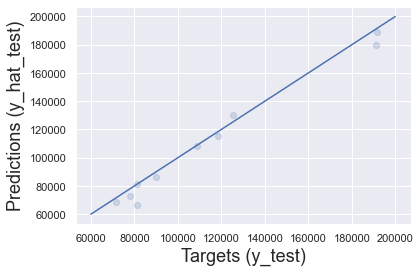

In [18]:
y_hat_test = reg.predict(x_test)

plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)

plt.plot(range(60000, 200000), range(60000, 200000))
plt.show()

In [19]:
df_pf = pd.DataFrame()
df_pf['Residual'] = y_test - y_hat_test
df_pf['Difference%'] = np.absolute(df_pf['Residual']/y_test*100)

df_pf.describe()

,Residual,Difference%
count,10.000000,10.000000
mean,3810.019517,4.714955
std,5539.568812,5.090129
min,-4865.049693,0.369325
25%,944.132743,1.706441
50%,2904.035062,3.738761
75%,4886.861001,5.380312
max,14566.220275,17.932277


## Question 6

### Define a new dataset

In [25]:
data2 = raw_data.drop('Administration Expenditure', axis = 1)
data2

,R&D Expenditure,Marketing Expenditure,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94
5,131876.90,362861.36,156991.12
6,134615.46,127716.82,156122.51
7,130298.13,323876.68,155752.60
8,120542.52,311613.29,152211.77
9,123334.88,304981.62,149759.96


### Define new targets and variables

In [26]:
targets = data2['Profit']
inputs = data2.drop(['Profit'],axis=1)

### Perform the linear regression

In [27]:
reg = LinearRegression()
reg.fit(inputs,targets)

LinearRegression()

### Display the new weights

In [28]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,R&D Expenditure,0.796584
1,Marketing Expenditure,0.029908


### Display the new intercept

In [29]:
reg.intercept_

46975.86422071998

### Predict the profit

In [30]:
reg.intercept_ + reg.coef_[0] * 125000 + reg.coef_[1] * 420000

159110.17731414826